In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [38]:
f, sr = 256, 44100
frame = sr//f

x = np.arange(frame*10)

A1, A2 = 0.8, 0.2
T1, T2 = 1, (1/3.) + 0.001
y1 = A1 * np.sin(2*np.pi*(1/T1)*(x/frame))
y2 = A2 * np.sin(2*np.pi*(1/T2)*(x/frame))
noise = np.random.normal(scale=0.1, size=x.shape[0])
y = y1 + y2 + noise

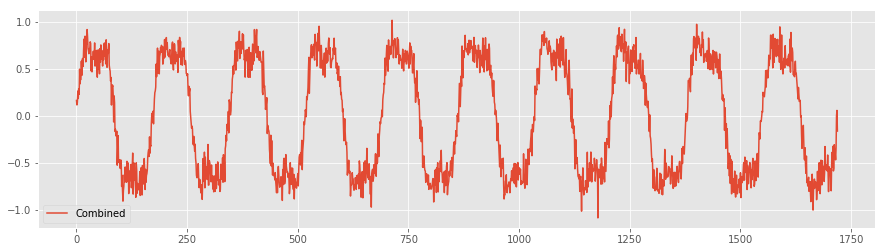

In [39]:
plt.figure(figsize=(15,4))
# plt.plot(x,y1, label = 'y1')
# plt.plot(x,y2, label = 'y2')
plt.plot(x,y, label = 'Combined')
plt.legend()
plt.show()

In [26]:
# ft = np.fft.fft(y)
# ftf = np.fft.fftfreq(x.shape[-1])
# plt.figure()
# plt.plot(ftf, ft.real,  ftf, ft.imag)
# # plt.xlim([0, .05])

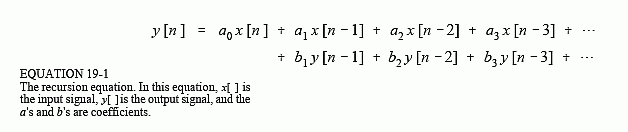

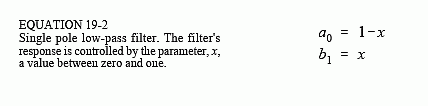

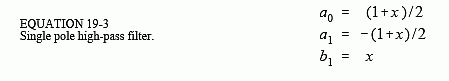

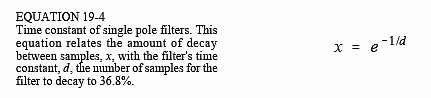

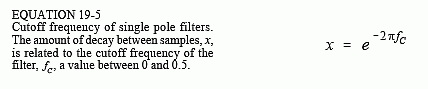

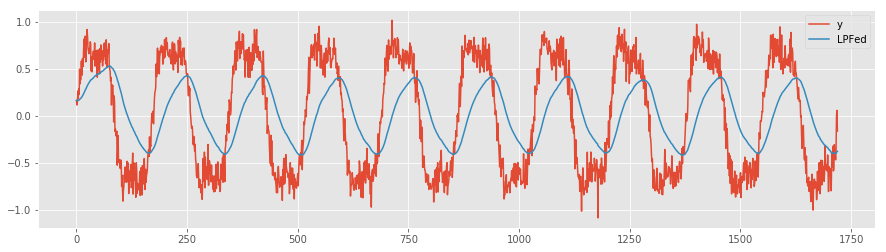

In [48]:
# LPF
fc = 1/300
xf = np.exp(-2*np.pi*fc)
yf = np.zeros(len(y))
yf[0] = y[0]
for i in range(1,len(y)):
    a0 = 1-xf
    b1 = xf
    yf[i] = a0*y[i] + b1*yf[i-1]
    
plt.figure(figsize=(15,4))
plt.plot(x,y, label = 'y')
# plt.plot(x,y2, label = 'y2')
plt.plot(x,yf, label = 'LPFed')
plt.legend()
plt.show()

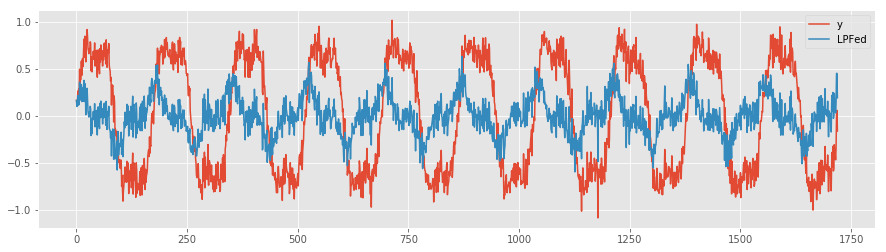

In [49]:
#HPF
fc = 1/50
xf = np.exp(-2*np.pi*fc)
yf = np.zeros(len(y))
yf[0] = y[0]
for i in range(1,len(y)):
    a0 = (1+xf)/2
    a1 = -(1+xf)/2
    b1 = xf
    yf[i] = a0*y[i] + a1*y[i-1] + b1*yf[i-1]
    
plt.figure(figsize=(15,4))
plt.plot(x,y, label = 'y')
# plt.plot(x,y2, label = 'y2')
plt.plot(x,yf, label = 'LPFed')
plt.legend()
plt.show()